In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('cash_flow.xlsb', engine='pyxlsb')

In [3]:
df.head()

,DT,OWNER,NET_DEMAND_ON,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_P1,NET_DEMAND_P2,NET_DEMAND_P3,NET_DEMAND_P4,NET_DEMAND_P5,PAID_AMOUNT,COVID_FLG
0,43101,SCB,5796685.08,3027793.88,612842.45,3520241.98,124047.66,72960159.28,NaN,NaN,NaN,NaN,NaN,1534819.0,Non_Covid
1,43101,SCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non_Covid
2,43101,SCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non_Covid
3,43101,KCG,7094777.48,3059544.99,1243654.00,240677.69,422184.60,111648.13,NaN,NaN,NaN,NaN,NaN,15852046.0,Non_Covid
4,43101,KCG,257801.05,88425.95,384473.99,172005.70,201573.33,2351922.82,NaN,NaN,NaN,NaN,NaN,566255.0,Non_Covid


In [4]:
df = df[['DT','OWNER','NET_DEMAND_ON','PAID_AMOUNT','NET_DEMAND_1', 'NET_DEMAND_2',	'NET_DEMAND_3',	'NET_DEMAND_4',	'NET_DEMAND_5']]

In [5]:
df.head()

,DT,OWNER,NET_DEMAND_ON,PAID_AMOUNT,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5
0,43101,SCB,5796685.08,1534819.0,3027793.88,612842.45,3520241.98,124047.66,72960159.28
1,43101,SCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43101,SCB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43101,KCG,7094777.48,15852046.0,3059544.99,1243654.00,240677.69,422184.60,111648.13
4,43101,KCG,257801.05,566255.0,88425.95,384473.99,172005.70,201573.33,2351922.82


In [6]:
df.dtypes

DT                 int64
OWNER             object
NET_DEMAND_ON    float64
PAID_AMOUNT      float64
NET_DEMAND_1     float64
NET_DEMAND_2     float64
NET_DEMAND_3     float64
NET_DEMAND_4     float64
NET_DEMAND_5     float64
dtype: object

In [7]:
df.columns

Index(['DT', 'OWNER', 'NET_DEMAND_ON', 'PAID_AMOUNT', 'NET_DEMAND_1',
       'NET_DEMAND_2', 'NET_DEMAND_3', 'NET_DEMAND_4', 'NET_DEMAND_5'],
      dtype='object')

In [8]:
df['PAID_AMOUNT'] = df['PAID_AMOUNT'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_ON'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_1'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_2'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_3'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_4'].astype(float)
df['NET_DEMAND_ON'] = df['NET_DEMAND_5'].astype(float)

In [9]:
df = df.pivot_table(
    index=['DT', 'OWNER'],
    values = ['PAID_AMOUNT', 'NET_DEMAND_ON', 'NET_DEMAND_1', 'NET_DEMAND_2', 'NET_DEMAND_3', 'NET_DEMAND_4', 'NET_DEMAND_5'],
    aggfunc = 'sum'
).reset_index()

In [10]:
df.head(20)

,DT,OWNER,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_ON,PAID_AMOUNT
0,43101,EXPR,0.000000e+00,2.550914e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,467260.00
1,43101,HCB,5.984127e+07,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,5.169108e+07,29062797.00
2,43101,HRB,8.517881e+06,1.043770e+06,6.932474e+06,8.970339e+06,1.701563e+06,1.701563e+06,59573247.00
3,43101,KCG,3.147971e+06,1.628128e+06,4.126834e+05,6.298059e+05,4.056660e+06,4.056660e+06,16418301.00
4,43101,SCB,3.027794e+06,6.128424e+05,3.520242e+06,1.240477e+05,7.296016e+07,7.296016e+07,1534819.00
5,43102,EXPR,2.550914e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,200000.00
6,43102,HCB,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,0.000000e+00,0.000000e+00,43001637.49
7,43102,HRB,1.043770e+06,6.932474e+06,8.970339e+06,1.701563e+06,0.000000e+00,0.000000e+00,44941716.00
8,43102,KCG,1.628128e+06,4.126834e+05,6.298059e+05,4.056660e+06,0.000000e+00,0.000000e+00,13594393.00
9,43102,SCB,6.128424e+05,3.520242e+06,1.240477e+05,7.296016e+07,0.000000e+00,0.000000e+00,2397496.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DT             11715 non-null  int64  
 1   OWNER          11715 non-null  object 
 2   NET_DEMAND_1   11715 non-null  float64
 3   NET_DEMAND_2   11715 non-null  float64
 4   NET_DEMAND_3   11715 non-null  float64
 5   NET_DEMAND_4   11715 non-null  float64
 6   NET_DEMAND_5   11715 non-null  float64
 7   NET_DEMAND_ON  11715 non-null  float64
 8   PAID_AMOUNT    11715 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 823.8+ KB


In [12]:
df.columns

Index(['DT', 'OWNER', 'NET_DEMAND_1', 'NET_DEMAND_2', 'NET_DEMAND_3',
       'NET_DEMAND_4', 'NET_DEMAND_5', 'NET_DEMAND_ON', 'PAID_AMOUNT'],
      dtype='object')

In [13]:
start_date = pd.to_datetime('2000-01-01')
df['DT'] = start_date + pd.to_timedelta(df['DT'], unit='D')

In [14]:
grouped_data = df.groupby(['DT', 'OWNER']).sum().reset_index()
grouped_data.set_index('DT', inplace=True)

grouped_data

,OWNER,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_ON,PAID_AMOUNT
DT,,,,,,,,
2118-01-03,EXPR,0.00,255091.38,0.000000e+00,0.00,0.00,0.00,467260.0
2118-01-03,HCB,59841270.05,126296.66,1.105410e+08,64700067.66,51691084.09,51691084.09,29062797.0
2118-01-03,HRB,8517880.71,1043770.35,6.932474e+06,8970339.18,1701563.15,1701563.15,59573247.0
2118-01-03,KCG,3147970.94,1628127.99,4.126834e+05,629805.95,4056659.82,4056659.82,16418301.0
2118-01-03,SCB,3027793.88,612842.45,3.520242e+06,124047.66,72960159.28,72960159.28,1534819.0
...,...,...,...,...,...,...,...,...
2124-06-02,EXPR,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
2124-06-02,HCB,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0
2124-06-02,HRB,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0


In [15]:
import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
# owners = grouped_data['OWNER'].unique()
# forecast_results = {}

In [17]:
# for owner in owners:
#     owner_data = grouped_data[grouped_data['OWNER'] == owner]['PAID_AMOUNT']
    
#     # Plotting the data for each owner
#     plt.figure(figsize=(10, 6))
#     plt.plot(owner_data, label=f'Paid Amount - {owner}')
#     plt.title(f'Paid Amount Over Time for {owner}')
#     plt.xlabel('Date')
#     plt.ylabel('Paid Amount')
#     plt.legend()
#     plt.show()
    
#     # Training the SARIMA model
#     model = SARIMAX(owner_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
#     results = model.fit()
    
#     # Making predictions
#     forecast = results.get_forecast(steps=12)
#     forecast_index = pd.date_range(start=owner_data.index[-1] + pd.Timedelta(days=1), periods=12, freq='D')
#     forecast_data = forecast.predicted_mean
#     forecast_data.index = forecast_index
    
#     # Storing the forecast results
#     forecast_results[owner] = forecast_data
    
#     # Plotting the forecast
#     plt.figure(figsize=(10, 6))
#     plt.plot(owner_data, label='Paid Amount')
#     plt.plot(forecast_data, label='Forecast', color='red')
#     plt.title(f'Paid Amount Forecast for {owner}')
#     plt.xlabel('Date')
#     plt.ylabel('Paid Amount')
#     plt.legend()
#     plt.show()

# forecast_results

In [18]:
hcb_data = grouped_data[grouped_data['OWNER']=='HCB']
hcb_data = hcb_data[:'2122']
hcb_data

,OWNER,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_ON,PAID_AMOUNT
DT,,,,,,,,
2118-01-03,HCB,5.984127e+07,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,5.169108e+07,29062797.00
2118-01-04,HCB,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,0.000000e+00,0.000000e+00,43001637.49
2118-01-05,HCB,1.105410e+08,6.470007e+07,5.169108e+07,0.000000e+00,2.203695e+08,2.203695e+08,42632484.36
2118-01-06,HCB,6.470007e+07,5.169108e+07,0.000000e+00,2.203695e+08,5.976720e+07,5.976720e+07,47714646.00
2118-01-07,HCB,5.169108e+07,0.000000e+00,2.203695e+08,5.976720e+07,4.365490e+04,4.365490e+04,41129218.30
...,...,...,...,...,...,...,...,...
2122-12-27,HCB,1.389147e+08,8.110460e+07,8.035125e+07,3.878072e+07,1.988278e+07,1.988278e+07,17600723.00
2122-12-28,HCB,8.110460e+07,8.035125e+07,3.878072e+07,1.988278e+07,9.813499e+07,9.813499e+07,41545102.81
2122-12-29,HCB,8.035125e+07,3.878072e+07,1.988278e+07,9.813499e+07,0.000000e+00,0.000000e+00,41814977.00


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

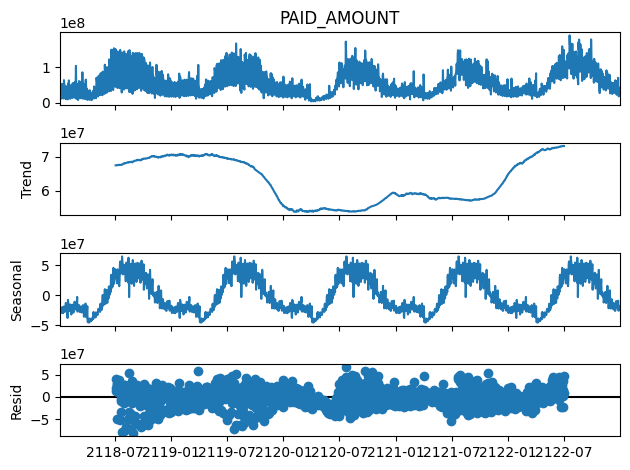

In [20]:
seasonal_decompose(hcb_data['PAID_AMOUNT'], model = 'additive', period = 365).plot()
plt.show()

In [21]:
test_days = 10
train = hcb_data[:-test_days]
test = hcb_data[-test_days:]
test

,OWNER,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_ON,PAID_AMOUNT
DT,,,,,,,,
2122-12-22,HCB,3.621058e+07,3.129376e+07,9.692861e+07,1.897486e+07,0.000000e+00,0.000000e+00,49547162.06
2122-12-23,HCB,3.129376e+07,9.692861e+07,1.897486e+07,0.000000e+00,1.389147e+08,1.389147e+08,48840378.16
2122-12-24,HCB,9.692861e+07,1.897486e+07,0.000000e+00,1.389147e+08,8.110460e+07,8.110460e+07,51410588.41
2122-12-25,HCB,1.897486e+07,0.000000e+00,1.389147e+08,8.110460e+07,8.035125e+07,8.035125e+07,70019830.26
2122-12-26,HCB,0.000000e+00,1.389147e+08,8.110460e+07,8.035125e+07,3.878072e+07,3.878072e+07,28450406.00
2122-12-27,HCB,1.389147e+08,8.110460e+07,8.035125e+07,3.878072e+07,1.988278e+07,1.988278e+07,17600723.00
2122-12-28,HCB,8.110460e+07,8.035125e+07,3.878072e+07,1.988278e+07,9.813499e+07,9.813499e+07,41545102.81
2122-12-29,HCB,8.035125e+07,3.878072e+07,1.988278e+07,9.813499e+07,0.000000e+00,0.000000e+00,41814977.00
2122-12-30,HCB,3.878072e+07,1.988278e+07,9.813499e+07,0.000000e+00,5.117123e+07,5.117123e+07,42024011.12


In [22]:
from pmdarima import auto_arima
arima_model = auto_arima(train['PAID_AMOUNT'],
                        seasonal = False)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1814
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -32923.264
Date:                Thu, 13 Jun 2024   AIC                          65862.529
Time:                        14:51:53   BIC                          65906.551
Sample:                    01-03-2118   HQIC                         65878.773
                         - 12-21-2122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2020      0.017     11.865      0.000       0.169       0.235
ar.L2         -0.5825      0.015    -39.650      0.000      -0.611      -0.554
ar.L3         -0.3816      0.017    -23.017      0.000      -0.414      -0.349
ar.L4         -0.3257      0.015    -21.457      0.000      -0.355      -0.296
ar.L5         -0.4420      0.017    -26.038      0.000      -0.475      -0.409
ma.L1         -1.1586      0.010   -121.219      0.000      -1.177      -1.140
ma.L2          0.8858      0.010     87.236      0.000       0.866       0.906
sigma2      2.989e+14   5.84e-18   5.12e+31      0.000    2.99e+14    2.99e+14
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):               371.55
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+46. Standard errors may be unstable.
"""

In [23]:
test_predictions = arima_model.predict(nperiod = len(test))
test_predictions

2122-12-22    5.504925e+07
2122-12-23    5.740961e+07
2122-12-24    5.566141e+07
2122-12-25    5.088781e+07
2122-12-26    3.494356e+07
2122-12-27    3.649786e+07
2122-12-28    4.744777e+07
2122-12-29    5.716601e+07
2122-12-30    5.946016e+07
2122-12-31    5.662543e+07
Freq: D, dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [25]:
mae = mean_absolute_error(test['PAID_AMOUNT'], test_predictions)
mse = mean_squared_error(test['PAID_AMOUNT'], test_predictions, squared = False)
mape = mean_absolute_percentage_error(test['PAID_AMOUNT'], test_predictions) * 100
print(f"Mean Absolute Error (MAE): {mae:.0f}")
print(f"Mean Squared Error (MSE): {mse:.0f}")
print(f"Mean Absolute  Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 12079219
Mean Squared Error (MSE): 13536810
Mean Absolute  Error (MAPE): 33.84%


In [26]:
correlation_matrix = hcb_data.corr(numeric_only=True)

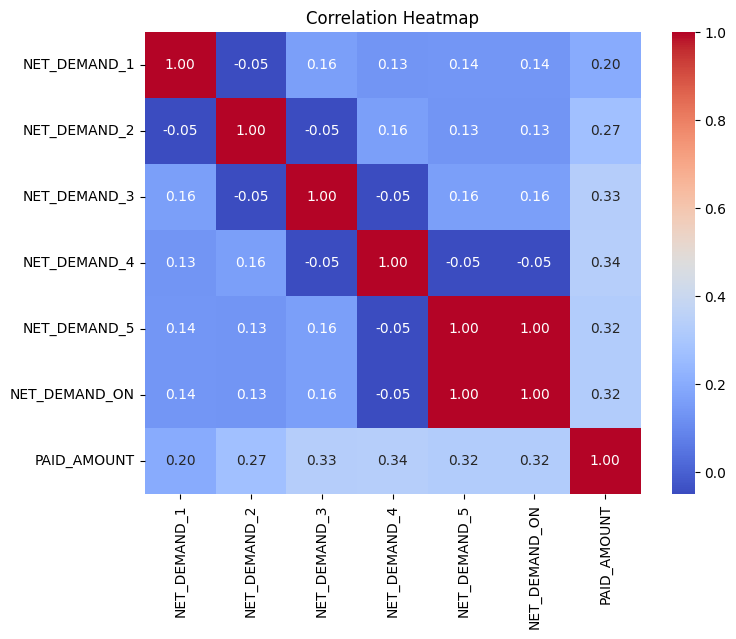

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

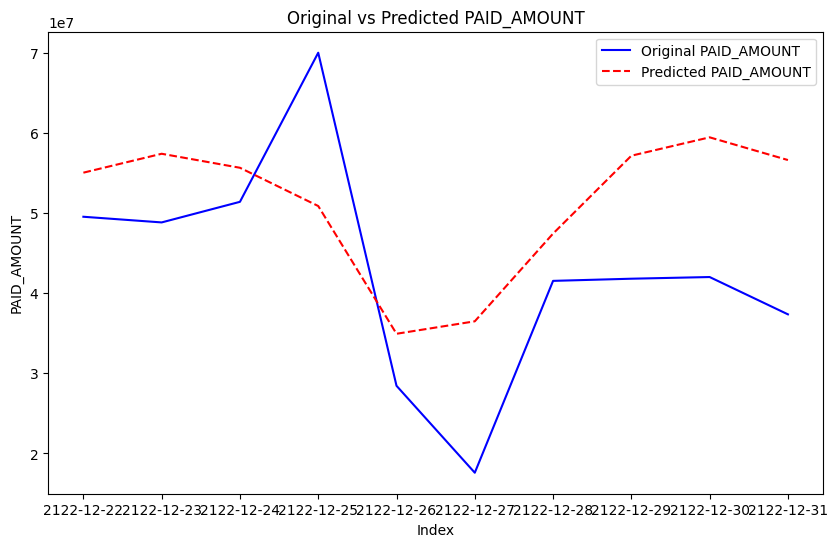

In [28]:
Y_test = test['PAID_AMOUNT']
X_test = test.drop("PAID_AMOUNT", axis = 'columns')
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, Y_test, 'b-', label='Original PAID_AMOUNT')
plt.plot(X_test.index, test_predictions, 'r--', label='Predicted PAID_AMOUNT')
plt.xlabel('Index')
plt.ylabel('PAID_AMOUNT')
plt.title('Original vs Predicted PAID_AMOUNT')
plt.legend()
plt.show()

In [29]:
# random forest regular regresion nueral networks lstm

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)
Y_test = test['PAID_AMOUNT']
X_test = test.drop(columns = ['PAID_AMOUNT', 'OWNER'])
Y_train = train['PAID_AMOUNT']
X_train = train.drop(columns = ['PAID_AMOUNT', 'OWNER'])
X_train

,NET_DEMAND_1,NET_DEMAND_2,NET_DEMAND_3,NET_DEMAND_4,NET_DEMAND_5,NET_DEMAND_ON
DT,,,,,,
2118-01-03,5.984127e+07,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,5.169108e+07
2118-01-04,1.262967e+05,1.105410e+08,6.470007e+07,5.169108e+07,0.000000e+00,0.000000e+00
2118-01-05,1.105410e+08,6.470007e+07,5.169108e+07,0.000000e+00,2.203695e+08,2.203695e+08
2118-01-06,6.470007e+07,5.169108e+07,0.000000e+00,2.203695e+08,5.976720e+07,5.976720e+07
2118-01-07,5.169108e+07,0.000000e+00,2.203695e+08,5.976720e+07,4.365490e+04,4.365490e+04
...,...,...,...,...,...,...
2122-12-17,4.356010e+07,5.249589e+07,0.000000e+00,1.394568e+08,6.978984e+07,6.978984e+07
2122-12-18,5.249589e+07,0.000000e+00,1.394568e+08,6.978984e+07,3.621058e+07,3.621058e+07
2122-12-19,0.000000e+00,1.394568e+08,6.978984e+07,3.621058e+07,3.129376e+07,3.129376e+07


In [50]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [51]:
Y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mse, r2

(111621369266179.53, 0.36958679651129756)

In [53]:
Y_pred

array([50130821.85049998, 50625137.24519998, 48370906.34750002,
       48997170.8772    , 47290293.05730002, 20259391.0493    ,
       53440749.7883    , 53715994.4275    , 38241100.45020001,
       35941044.0684    ])

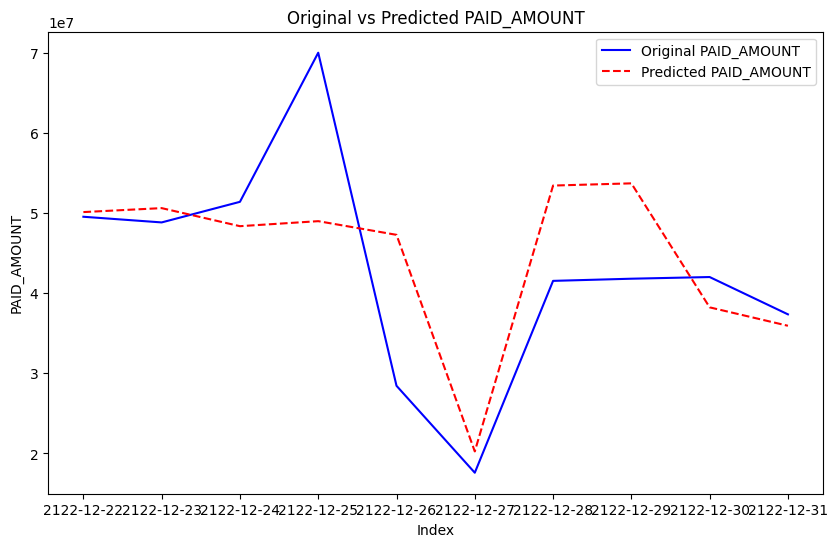

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, Y_test, 'b-', label='Original PAID_AMOUNT')
plt.plot(X_test.index, Y_pred, 'r--', label='Predicted PAID_AMOUNT')
plt.xlabel('Index')
plt.ylabel('PAID_AMOUNT')
plt.title('Original vs Predicted PAID_AMOUNT')
plt.legend()
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

In [58]:
li = LinearRegression()
li.fit(X_train, Y_train)

LinearRegression()

In [59]:
y_pred = li.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mse , r2

(111621369266179.53, 0.36958679651129756)

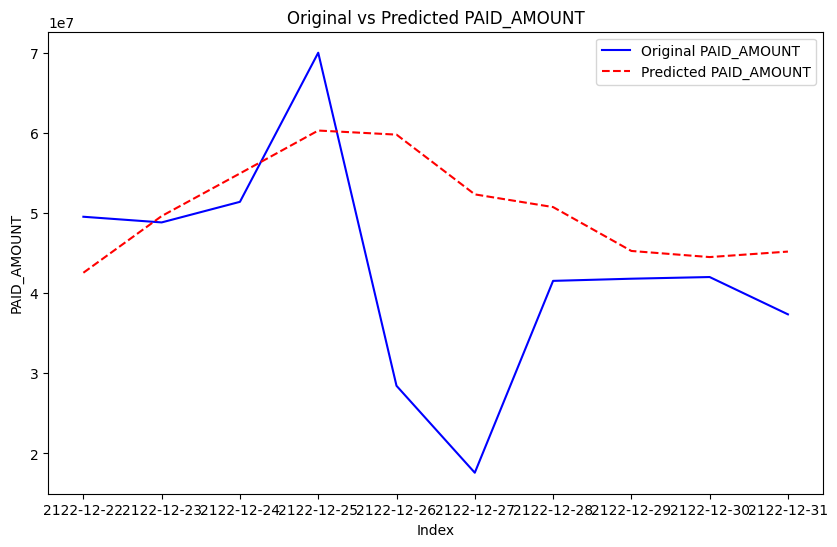

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, Y_test, 'b-', label='Original PAID_AMOUNT')
plt.plot(X_test.index, y_pred, 'r--', label='Predicted PAID_AMOUNT')
plt.xlabel('Index')
plt.ylabel('PAID_AMOUNT')
plt.title('Original vs Predicted PAID_AMOUNT')
plt.legend()
plt.show()